In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import numpy as np

import joblib


In [2]:
# Load the dataset
df = pd.read_csv("diabetes_binary_health_indicators.csv")
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [25]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [11]:
# Display the first few rows
print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

### Convert Float to Integer

In [14]:
# Convert all columns to integers
df = df.astype(int)

# Verify data types after conversion
print(df.dtypes)
print(df.head())


Diabetes_binary         int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object
   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         1          1   40       1       0   
1                0       0         0          0   25       1       0   
2                0       1         1          1   28       0       0   
3                0       1         0  

### Identify Categorical Features

In [17]:
# Check unique values for each column
for col in df.columns:
    print(f"{col}: {df[col].unique()}")  # Show first 10 unique values


Diabetes_binary: [0 1]
HighBP: [1 0]
HighChol: [1 0]
CholCheck: [1 0]
BMI: [40 25 28 27 24 30 34 26 33 21 23 22 38 32 37 31 29 20 35 45 39 19 47 18
 36 43 55 49 42 17 16 41 44 50 59 48 52 46 54 57 53 14 15 51 58 63 61 56
 74 62 64 66 73 85 60 67 65 70 82 79 92 68 72 88 96 13 81 71 75 12 77 69
 76 87 89 84 95 98 91 86 83 80 90 78]
Smoker: [1 0]
Stroke: [0 1]
HeartDiseaseorAttack: [0 1]
PhysActivity: [0 1]
Fruits: [0 1]
Veggies: [1 0]
HvyAlcoholConsump: [0 1]
AnyHealthcare: [1 0]
NoDocbcCost: [0 1]
GenHlth: [5 3 2 4 1]
MentHlth: [18  0 30  3  5 15 10  6 20  2 25  1  4  7  8 21 14 26 29 16 28 11 12 24
 17 13 27 19 22  9 23]
PhysHlth: [15  0 30  2 14 28  7 20  3 10  1  5 17  4 19  6 12 25 27 21 22  8 29 24
  9 16 18 23 13 26 11]
DiffWalk: [1 0]
Sex: [0 1]
Age: [ 9  7 11 10  8 13  4  6  2 12  5  1  3]
Education: [4 6 3 5 2 1]
Income: [3 1 8 6 4 7 2 5]


##### *Binary Categorical 
##### Diabetes_binary, HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex
##### No encoding needed since they are already in 0s and 1s.

##### *Ordinal Categorical:
##### GenHlth (1 to 5), Education (1 to 6), Income (1 to 8), Age (1 to 13)
##### These are already in numerical form, so no encoding is needed.

##### *Numerical Features: BMI, MentHlth, PhysHlth
##### These are continuous numbers

## Exploratory Data Analysis (EDA)

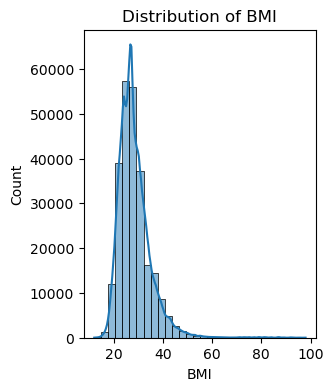

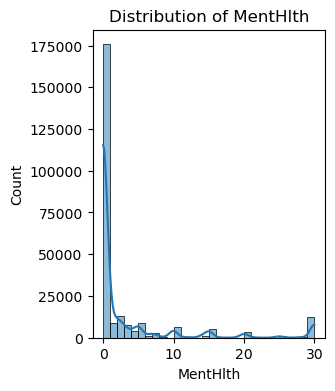

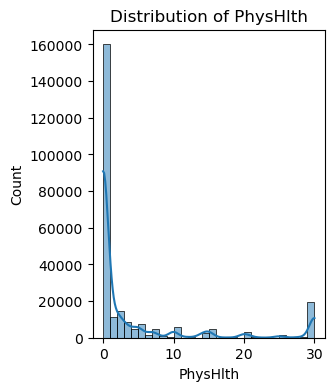

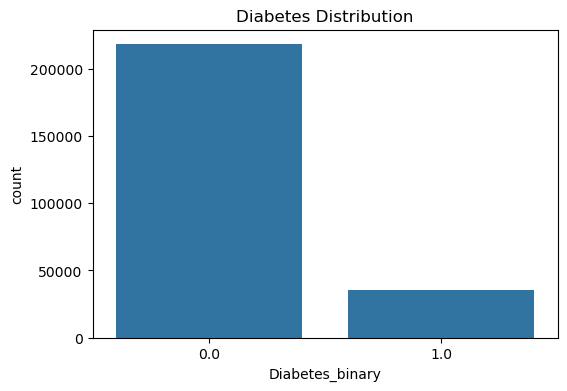

In [58]:


# Plot the distribution of BMI
plt.figure(figsize=(3,4))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

# Plot the distribution of MentHlth
plt.figure(figsize=(3,4))
sns.histplot(df['MentHlth'], bins=30, kde=True)
plt.title('Distribution of MentHlth')
plt.show()

# Plot the distribution of PhysHlth
plt.figure(figsize=(3,4))
sns.histplot(df['PhysHlth'], bins=30, kde=True)
plt.title('Distribution of PhysHlth')
plt.show()

# Count plot for Diabetes_binary (Target variable)
plt.figure(figsize=(6,4))
sns.countplot(x=df['Diabetes_binary'])
plt.title('Diabetes Distribution')
plt.show()

plt.show()


### Visualizing the Distribution of Numerical Features

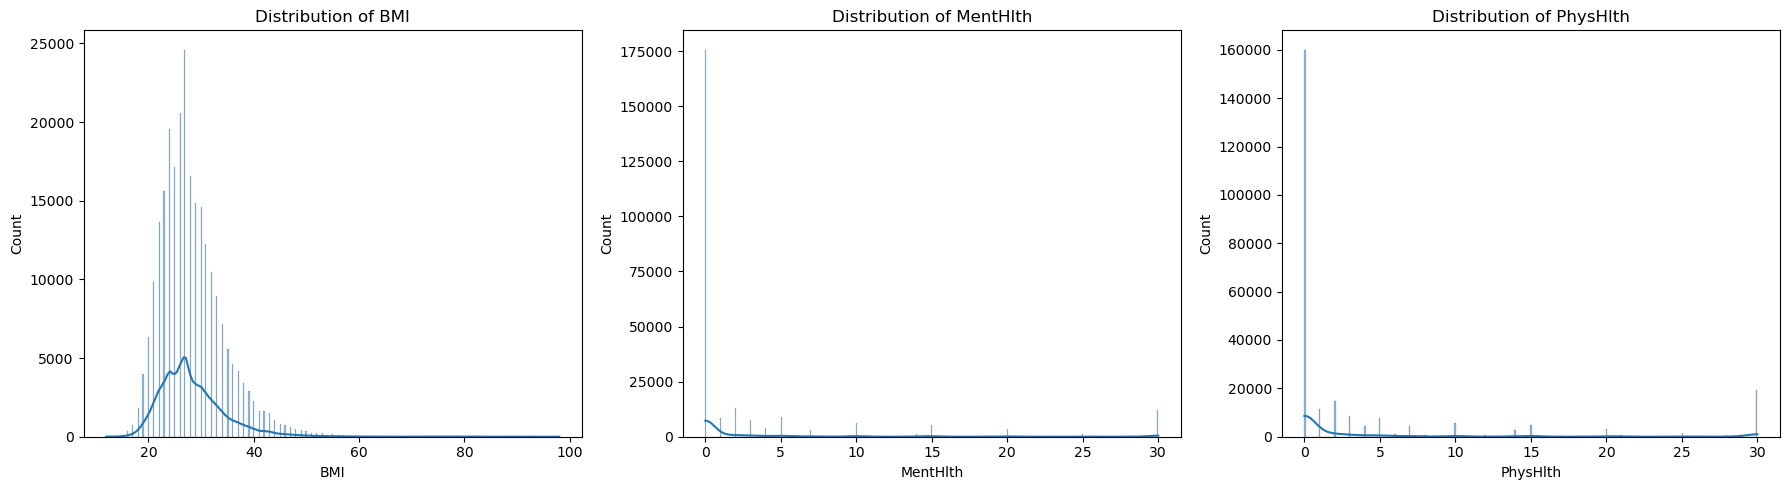

In [60]:
# Define the numerical features
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

# Create subplots
fig, axs = plt.subplots(1, len(numerical_features), figsize=(18, 5))

# Plot each feature on a different subplot
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')

# Adjust the layout
plt.tight_layout()
plt.show()



#### Insights from the distributions:

##### BMI Distribution:
##### -The BMI values are right-skewed, with most people falling between 20 and 40.
##### -There are a few outliers with very high BMI values.

##### Mental Health Days (MentHlth):
##### -A large proportion of people reported 0 mentally unhealthy days, but there are spikes at common points like 15 and 30.
##### -This suggests that many people either report no issues or severe/long-term struggles.

##### Physical Health Days (PhysHlth):
##### -Similar to mental health, many people report 0 days of bad physical health, with spikes at 30 (potentially representing chronic conditions).

### Visualizing Binary Categorical Features

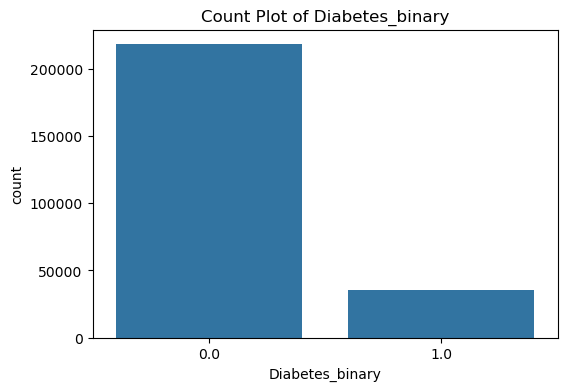

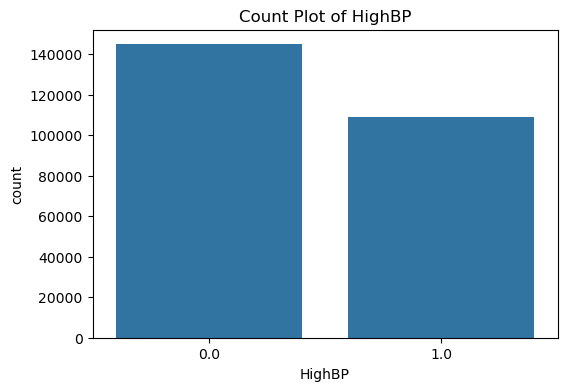

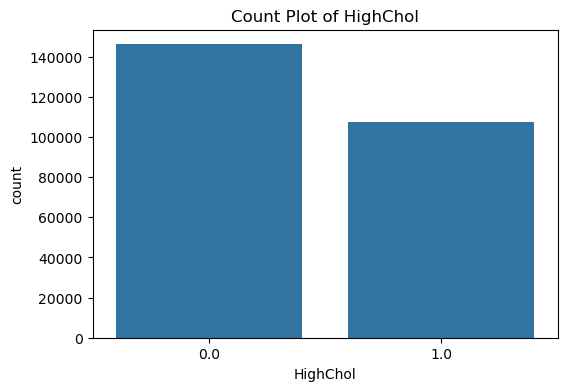

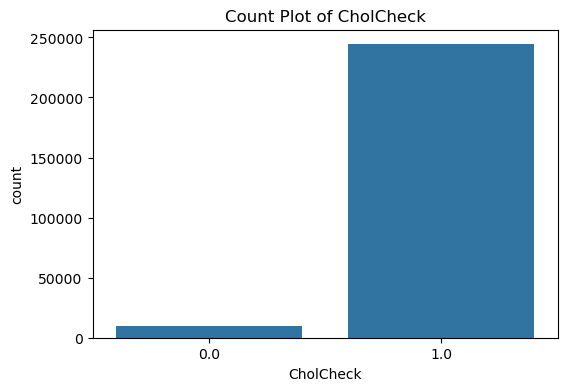

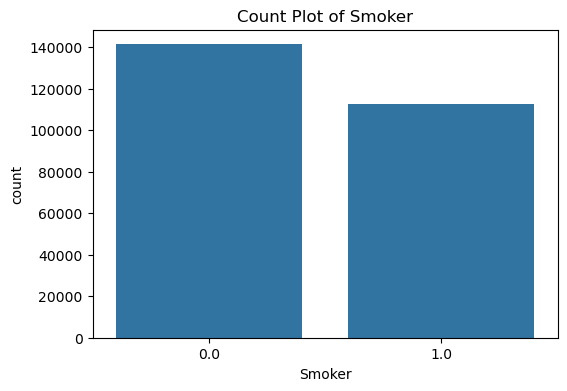

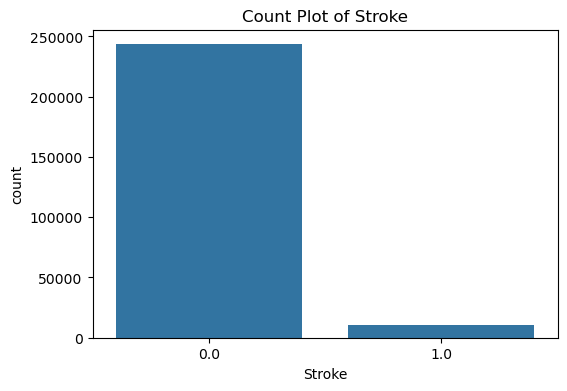

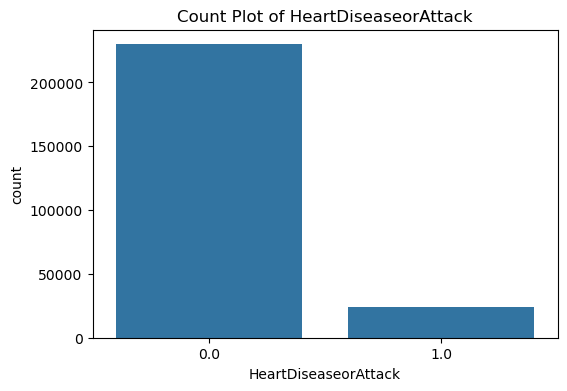

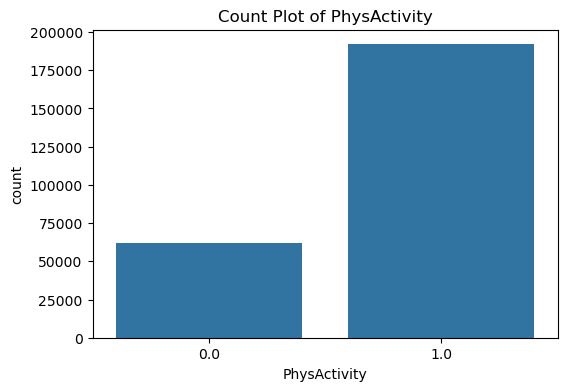

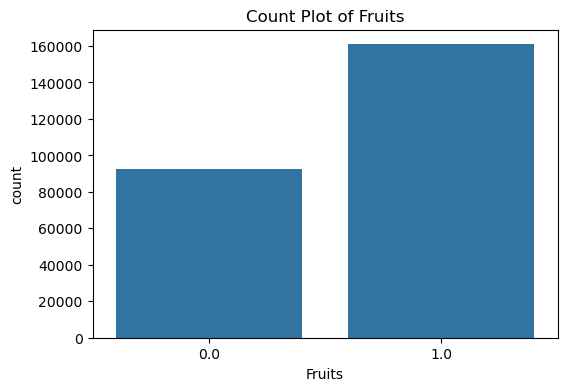

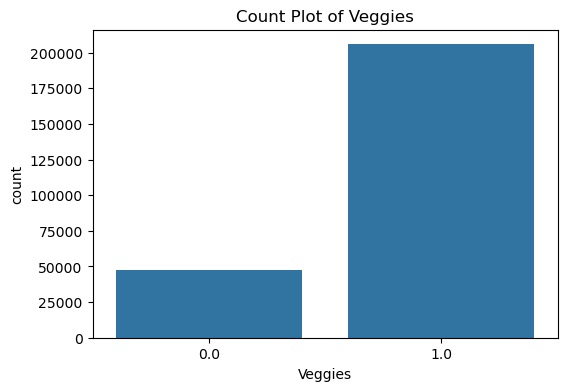

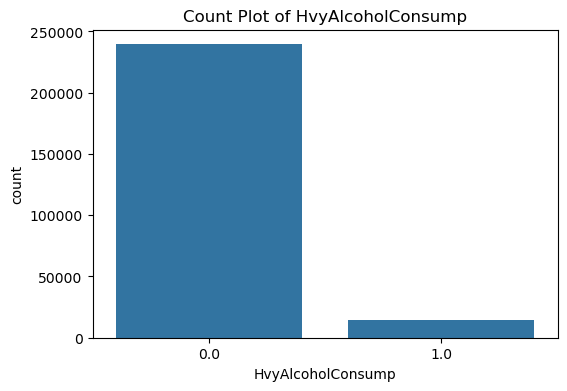

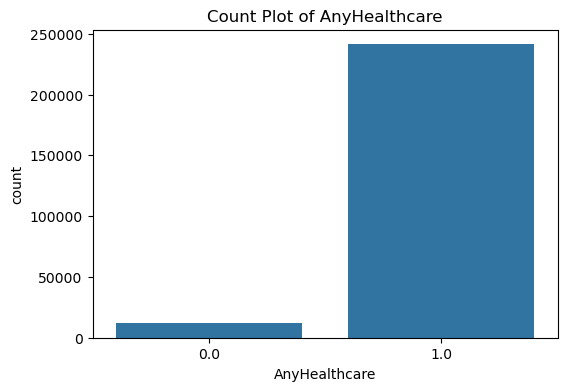

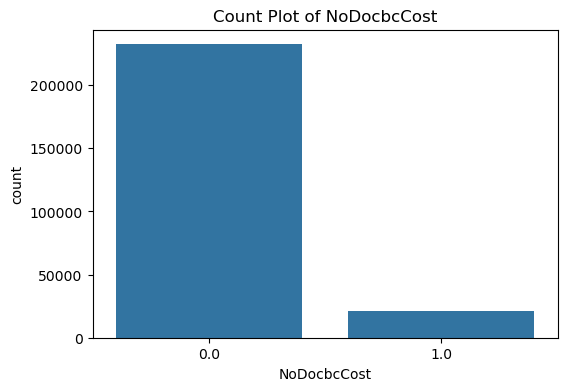

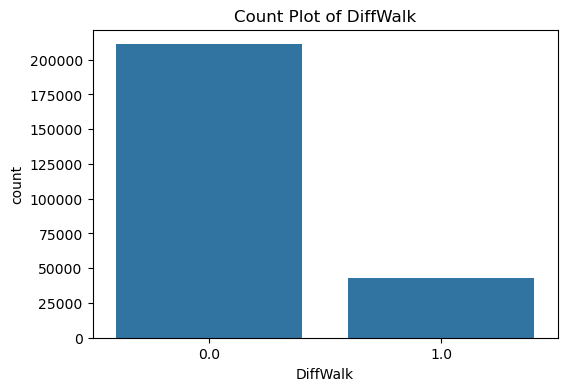

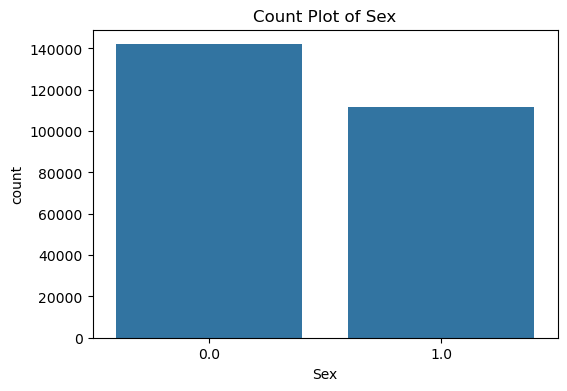

In [65]:
# Plot count plots for binary categorical features
binary_features = ['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                   'DiffWalk', 'Sex']

for feature in binary_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count Plot of {feature}')
    plt.show()


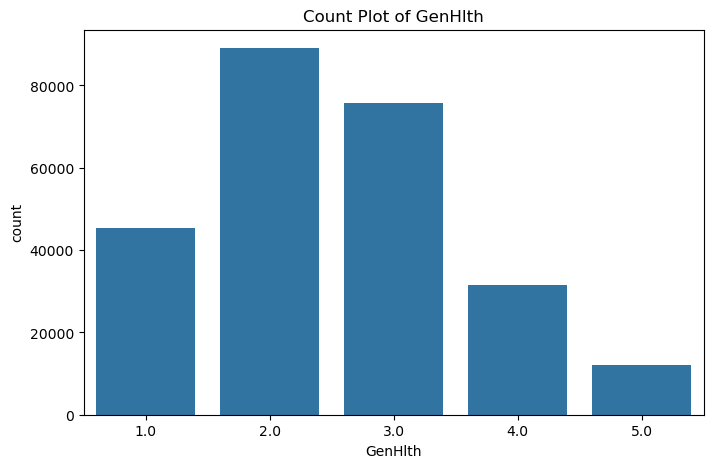

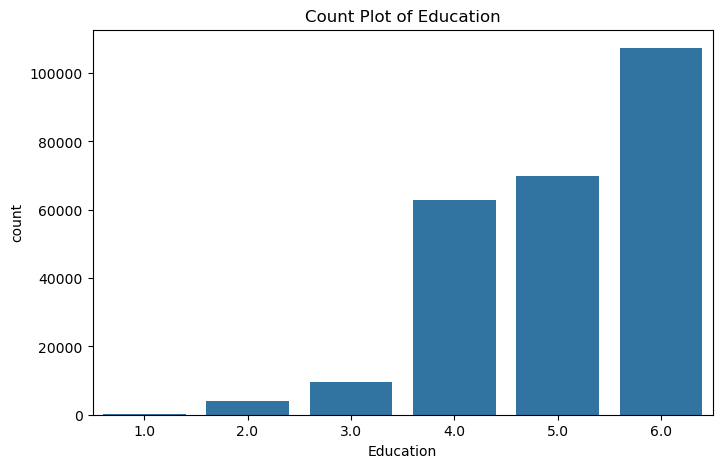

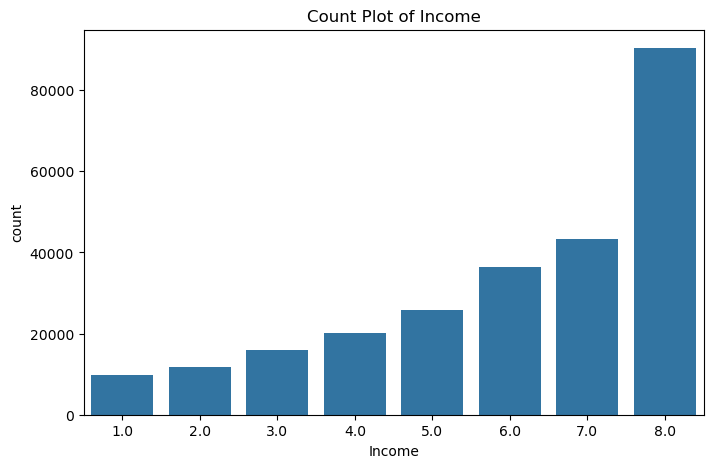

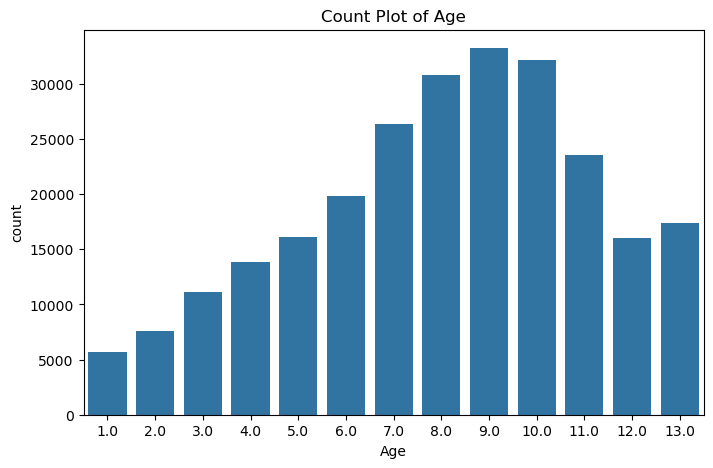

In [67]:
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']

for feature in ordinal_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, order=sorted(df[feature].unique()))
    plt.title(f'Count Plot of {feature}')
    plt.show()


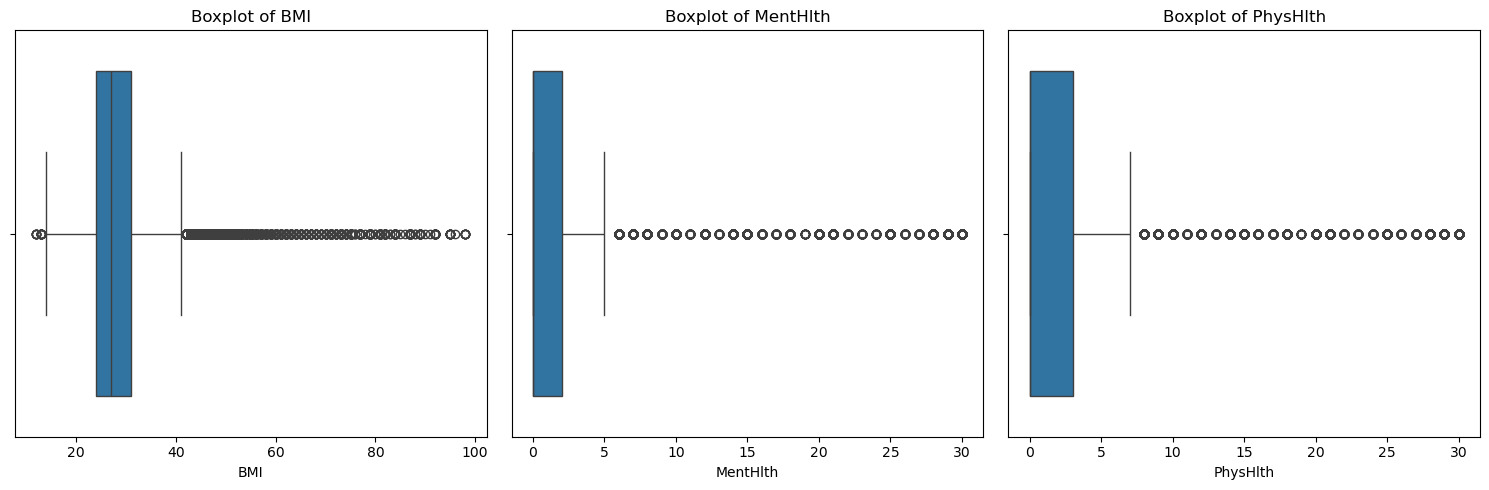

In [69]:
# Visualize outliers with boxplots
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()


In [71]:
# Function to handle outliers
def handle_outliers(df, feature, method='clip'):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == 'remove':
        # Remove rows with outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    elif method == 'clip':
        # Clip values to stay within the bounds
        df[feature] = df[feature].clip(lower_bound, upper_bound)
    
    return df

# Apply outlier handling
for feature in numerical_features:
    df = handle_outliers(df, feature, method='clip')  # Use 'remove' to drop outliers instead

# Check results
df[numerical_features].describe()


,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.107247,1.175240,1.850924
std,5.562154,1.953799,2.887205
min,13.500000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,41.500000,5.000000,7.500000


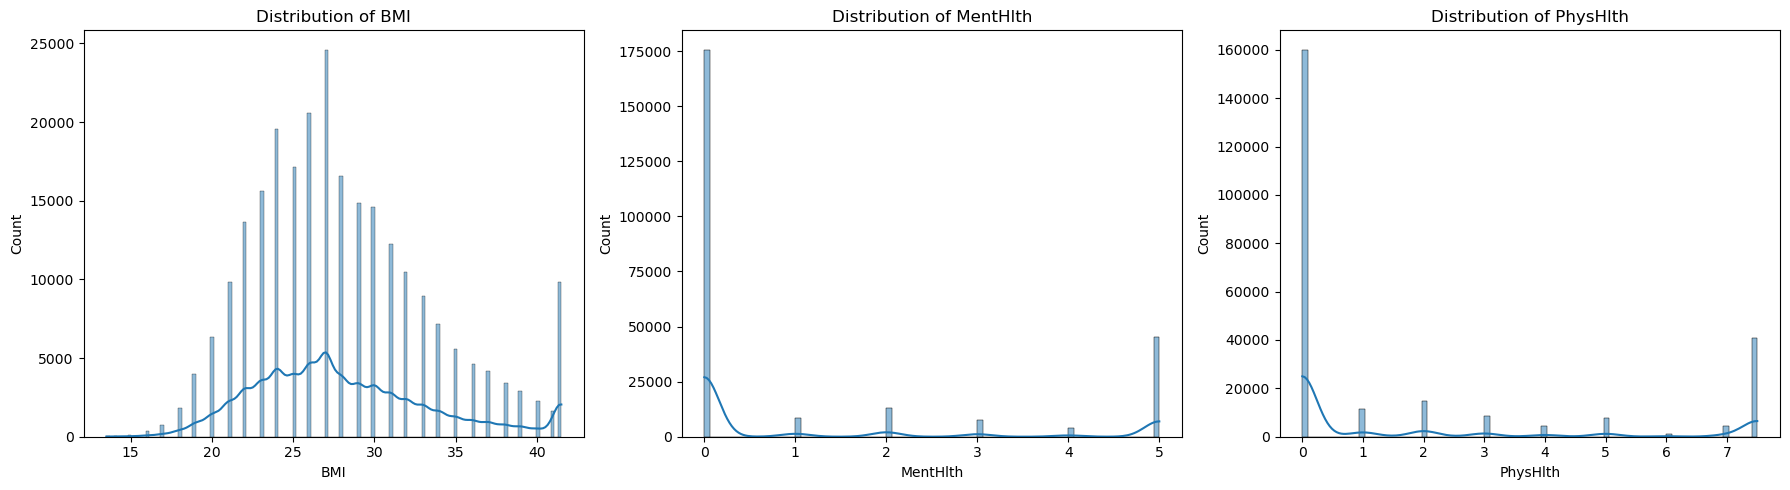

In [73]:
# Define the numerical features
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

# Create subplots
fig, axs = plt.subplots(1, len(numerical_features), figsize=(18, 5))

# Plot each feature on a different subplot
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')

# Adjust the layout
plt.tight_layout()
plt.show()

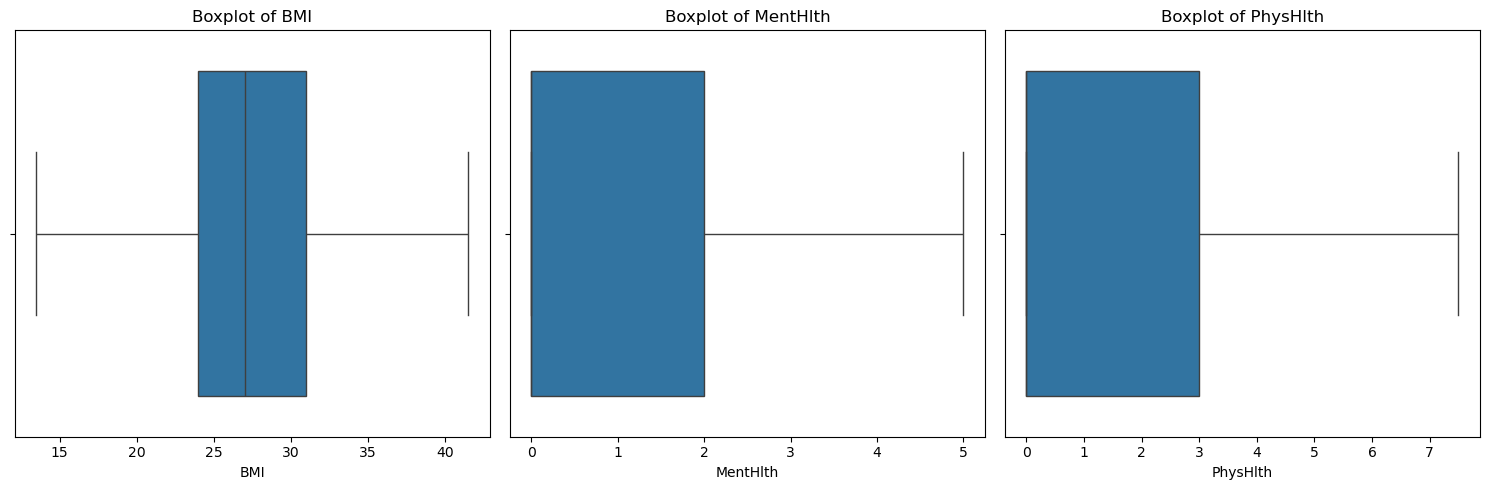

In [75]:
# Visualize outliers with boxplots
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [5]:
df.to_csv("cleaned_data.csv",index=False)
print("successfully saved")

successfully saved


In [3]:
clean_data = pd.read_csv("cleaned_data.csv")
clean_data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,41.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [13]:
# Compute the correlation matrix using Spearman correlation
correlation_matrix = clean_data.corr(method='spearman')

# Check the correlation values
correlation_matrix


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.226307,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.287697,0.036280,0.154669,0.218344,0.031430,0.177684,-0.120038,-0.163305
HighBP,0.263129,1.000000,0.298199,0.098508,0.243792,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.303300,0.016690,0.148143,0.223618,0.052207,0.344535,-0.141970,-0.179161
HighChol,0.200276,0.298199,1.000000,0.085642,0.136310,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208640,0.041219,0.118425,0.144672,0.031205,0.266355,-0.068850,-0.087905
CholCheck,0.064761,0.098508,0.085642,1.000000,0.040293,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046351,-0.013373,0.030066,0.040585,-0.022115,0.093533,0.003870,0.015263
BMI,0.226307,0.243792,0.136310,0.040293,1.000000,0.023115,0.022436,0.063674,-0.144525,-0.096016,...,-0.013715,0.052114,0.257303,0.051263,0.115855,0.179374,0.089342,-0.024500,-0.123281,-0.092122
Smoker,0.060789,0.096991,0.091299,-0.009929,0.023115,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.159009,0.056468,0.091049,0.122463,0.093662,0.119304,-0.173566,-0.132663
Stroke,0.105816,0.129575,0.092620,0.024158,0.022436,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.163685,0.046522,0.124916,0.176567,0.002978,0.129060,-0.072970,-0.123728
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.063674,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.242243,0.031018,0.153813,0.212709,0.086096,0.227639,-0.095910,-0.141485
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.144525,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.256241,-0.076391,-0.175055,-0.253174,0.032482,-0.088049,0.200248,0.202022
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.096016,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.105474,-0.062472,-0.044739,-0.048352,-0.091175,0.066934,0.114929,0.076415


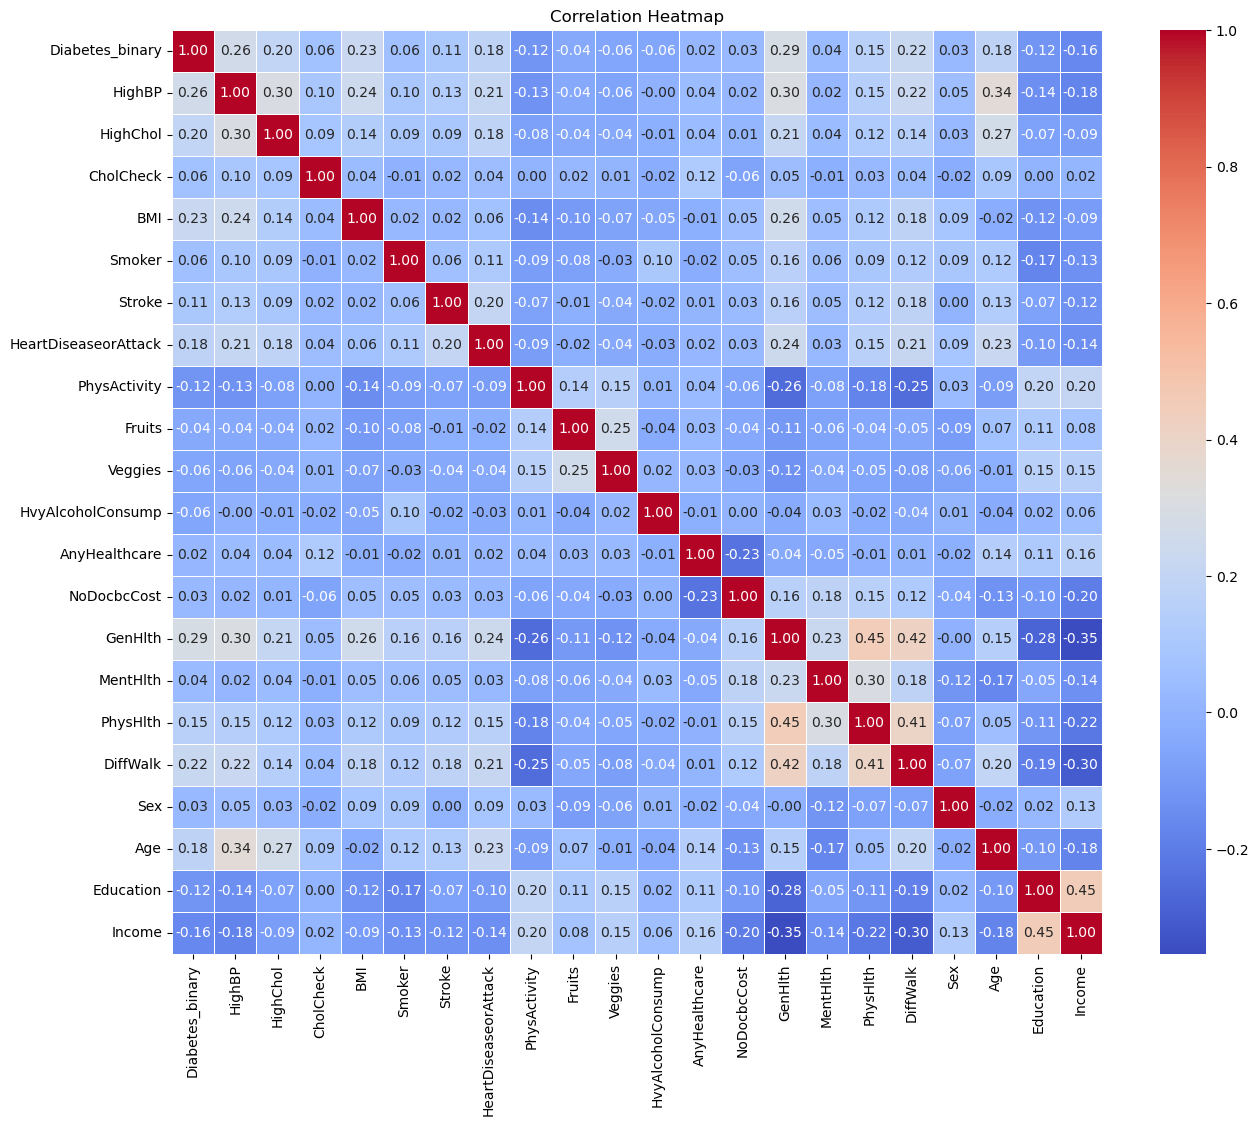

In [7]:


# Assume correlation_matrix is already defined
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()



## Insights from the Correlation Heatmap:

#### Strong Positive Correlations:

##### General Health (GenHlth) and Physical Health (PhysHlth): These two variables have a strong positive correlation (0.45), indicating that ##### individuals with better general health also tend to report better physical health.

##### General Health (GenHlth) and Mental Health (MentHlth): There's a positive correlation (0.23) between these variables, suggesting that ##### better general health is associated with better mental health.

##### Age and HighBP: Age has a notable positive correlation (0.34) with HighBP, indicating that the likelihood of having HighBP increases with age.

##### Age and Heart Disease or Attack: Age also has a positive correlation (0.23) with heart disease or attack, meaning that older individuals are more likely to experience these conditions.

#### Strong Negative Correlations:

##### Income and No Doctor because of Cost (NoDocbcCost): There is a strong negative correlation (-0.23), suggesting that individuals with higher income are less likely to avoid visiting a doctor due to cost concerns.

##### Education and No Doctor because of Cost (NoDocbcCost): Education also has a strong negative correlation (-0.17) with this variable, indicating that individuals with higher education levels are less likely to avoid medical care due to cost.

##### Income and General Health (GenHlth): Income has a negative correlation (-0.35) with general health, suggesting that higher income is associated with better general health.


#### Other Notable Correlations:

##### Diabetes_binary and High Blood Pressure (HighBP): There is a moderate positive correlation (0.26) between these variables.

##### High Blood Pressure (HighBP) and HighChol: HighBP also has a moderate positive correlation (0.30) with HighChol.

##### Physical Activity (PhysActivity) and General Health (GenHlth): There is a moderate negative correlation (-0.26) between these variables, suggesting that more physical activity is associated with better general health.

In [5]:
clean_data1 = clean_data.copy()
clean_data1

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,41.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
X = clean_data1.drop("Diabetes_binary", axis=1)  
y = clean_data1["Diabetes_binary"]


In [9]:
#apply selectKbest

# For categorical features (use chi2)
selector = SelectKBest(score_func=chi2, k=10)

# For numerical features (use f_classif)
# selector = SelectKBest(score_func=f_classif, k=10)

X_selected = selector.fit_transform(X, y)


In [11]:
X_selected

array([[ 1.,  1., 40., ...,  1.,  9.,  3.],
       [ 0.,  0., 25., ...,  0.,  7.,  1.],
       [ 1.,  1., 28., ...,  1.,  9.,  8.],
       ...,
       [ 0.,  0., 28., ...,  0.,  2.,  2.],
       [ 1.,  0., 23., ...,  0.,  7.,  1.],
       [ 1.,  1., 25., ...,  0.,  9.,  2.]])

In [13]:
feature_scores = pd.DataFrame({"Feature": X.columns, "Score": selector.scores_})
feature_scores = feature_scores.sort_values(by="Score", ascending=False)

print(feature_scores)


                 Feature         Score
15              PhysHlth  32374.622965
3                    BMI  15373.047368
16              DiffWalk  10059.506391
0                 HighBP  10029.013935
13               GenHlth   9938.507776
18                   Age   9276.141199
6   HeartDiseaseorAttack   7221.975378
1               HighChol   5859.710582
20                Income   4829.816361
5                 Stroke   2725.225194
14              MentHlth   1819.738464
7           PhysActivity    861.887532
10     HvyAlcoholConsump    779.424807
19             Education    756.035496
4                 Smoker    521.978858
12           NoDocbcCost    229.542412
8                 Fruits    154.291404
9                Veggies    153.169215
17                   Sex    140.248274
2              CholCheck     39.716825
11         AnyHealthcare      3.280938


### Insights from the Feature Scores:

##### *Most Important Features (High Scores):

##### -PhysHlth (32,374) — Strongest association with diabetes
##### -BMI (15,373) — A key factor for diabetes risk
##### -DiffWalk (10,059) — Mobility issues are linked to diabetes
##### -HighBP (10,029) — High blood pressure is a major risk factor
##### -GenHlth (9,938) — General health perception correlates with diabetes
##### -Age (9,276) — Older people have a higher risk of diabetes


##### *Moderately Important Features:

##### -HeartDiseaseorAttack, HighChol, Income, Stroke
##### These make sense, as heart health and cholesterol are closely tied to diabetes.


##### *Least Important Features (Low Scores):

##### -AnyHealthcare (3.28)
##### -CholCheck (39.71)
##### -Sex, Veggies, Fruits, NoDocbcCost — Low predictive power

In [15]:
#Load and Prepare the Data
X = clean_data1.drop("Diabetes_binary", axis=1)
Y = clean_data1["Diabetes_binary"]


In [17]:
#Choose the Best Features

selected_features = [
    'PhysHlth', 'BMI', 'DiffWalk', 'HighBP', 'GenHlth', 
    'Age', 'HeartDiseaseorAttack', 'HighChol', 'Income', 'Stroke'
]

X_selected = X[selected_features]
X_selected

,PhysHlth,BMI,DiffWalk,HighBP,GenHlth,Age,HeartDiseaseorAttack,HighChol,Income,Stroke
0,7.5,40.0,1.0,1.0,5.0,9.0,0.0,1.0,3.0,0.0
1,0.0,25.0,0.0,0.0,3.0,7.0,0.0,0.0,1.0,0.0
2,7.5,28.0,1.0,1.0,5.0,9.0,0.0,1.0,8.0,0.0
3,0.0,27.0,0.0,1.0,2.0,11.0,0.0,0.0,6.0,0.0
4,0.0,24.0,0.0,1.0,2.0,11.0,0.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
253675,5.0,41.5,0.0,1.0,3.0,5.0,0.0,1.0,7.0,0.0
253676,0.0,18.0,1.0,1.0,4.0,11.0,0.0,1.0,4.0,0.0
253677,0.0,28.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0
253678,0.0,23.0,0.0,1.0,3.0,7.0,0.0,0.0,1.0,0.0


In [19]:
# Check for Multicollinearity (VIF)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])
]

print(vif_data)

                Feature        VIF
0              PhysHlth   2.091247
1                   BMI  16.452857
2              DiffWalk   1.757919
3                HighBP   2.261168
4               GenHlth  10.065710
5                   Age   7.898714
6  HeartDiseaseorAttack   1.273789
7              HighChol   2.021416
8                Income   8.183857
9                Stroke   1.125798


## Feature Scaling

In [20]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X: (253680, 21)
Shape of y: (253680,)
Shape of X_train: (202944, 10)
Shape of X_test: (50736, 10)
Shape of y_train: (202944,)
Shape of y_test: (50736,)


## Build and train 5 models

In [31]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10)
}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f" {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("=" * 50)


 Logistic Regression
Accuracy: 0.8665838852097131
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.17      0.26      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

 Random Forest
Accuracy: 0.8468740145064648
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43739
         1.0       0.40      0.23      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.59      0.60     50736
weighted avg       0.82      0.85      0.83     50736

 Support Vector Machine
Accuracy: 0.8620900346893724
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     43739
         1.0      

C:\Users\RAGIKRISHNA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAGIKRISHNA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAGIKRISHNA\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 K-Nearest Neighbors
Accuracy: 0.8490815200252286
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     43739
         1.0       0.41      0.22      0.29      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.59      0.60     50736
weighted avg       0.82      0.85      0.83     50736

 Decision Tree
Accuracy: 0.8642384105960265
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.53      0.14      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.70      0.56      0.58     50736
weighted avg       0.83      0.86      0.83     50736



In [27]:

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print(X_resampled.shape)

(436668, 10)


In [43]:
print("hi")

hi


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("=" * 50)
    print(name)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.7477729177639866
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     43773
         1.0       0.74      0.77      0.75     43561

    accuracy                           0.75     87334
   macro avg       0.75      0.75      0.75     87334
weighted avg       0.75      0.75      0.75     87334

Random Forest
Accuracy: 0.8838367646048504
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88     43773
         1.0       0.89      0.88      0.88     43561

    accuracy                           0.88     87334
   macro avg       0.88      0.88      0.88     87334
weighted avg       0.88      0.88      0.88     87334

K-Nearest Neighbors
Accuracy: 0.8171617010557172
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.77      0.81     43773
         1.0       0.79 

###Model Performance After SMOTE
Logistic Regression
Accuracy: ~74.78%
Recall (Class 1): 0.77 → Much better than before!
Balanced Precision/Recall: F1-score around 0.75 for both classes.

Random Forest
Accuracy: ~88.39%
Strong Recall & Precision: Both around 0.88.
Best Overall Performer: Strongest balance across metrics.

K-Nearest Neighbors
Accuracy: ~81.72%
High Recall for Class 1: 0.86 → Capturing more positive cases.
Lower Precision for Class 1: May be misclassifying more negatives as positives.

Decision Tree
Accuracy: ~79.53%
Balanced Precision/Recall: Both around 0.80.

### Choose the Best Model


#### Random Forest had the highest accuracy and balanced recall.

### Set Up Hyperparameter Tuning

In [ ]:

#Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}


# Initialize the model
rf_model = RandomForestClassifier()

# Grid Search with Cross-Validation
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit the model
rf_grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Accuracy:", rf_grid_search.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Best Accuracy:", rf_grid_search.best_score_)


In [ ]:


# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf_model = RandomForestClassifier()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # Focus on F1-score since you care about both precision & recall
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [34]:
clean_data2 = clean_data.copy()
clean_data2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,5.0,7.5,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,41.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


##  Sample for Hyperparameter Tuning

In [36]:

# Take a random sample (e.g., 10% of the data)
sample_df = clean_data2.sample(frac=0.2, random_state=42)

# Separate features and target
X_sample = sample_df.drop("Diabetes_binary", axis=1)
y_sample = sample_df["Diabetes_binary"]

# Check the sample size
print(f"Sample dataset shape: {sample_df.shape}")



Sample dataset shape: (50736, 22)


In [38]:


# Split the sample dataset into train and test sets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

# Check the shapes of the train and test sets
print(f"Training set shape: {X_train_sample.shape}")
print(f"Test set shape: {X_test_sample.shape}")


Training set shape: (40588, 21)
Test set shape: (10148, 21)


In [40]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_sample_scaled = scaler.fit_transform(X_train_sample)

# Transform the test data based on the training data scaling
X_test_sample_scaled = scaler.transform(X_test_sample)

# Check the first 5 rows of scaled data
print(X_train_sample_scaled[:5])



[[-0.87061444 -0.86207382  0.19603082 -0.92490018  1.11431048 -0.20591704
  -0.32367584  0.57147059  0.75849545  0.48580558 -0.24384889  0.22561833
  -0.30164099 -1.41439476 -0.60170577 -0.63912337 -0.44897098 -0.88774793
   0.31759666  0.96968546  0.45367271]
 [ 1.14861407  1.15999346  0.19603082  2.39864115 -0.89741595 -0.20591704
  -0.32367584  0.57147059  0.75849545  0.48580558 -0.24384889 -4.43226403
   3.31519932  1.39450978  1.96287963 -0.63912337 -0.44897098 -0.88774793
  -0.66427101 -1.07104841 -0.99858566]
 [-0.87061444 -0.86207382  0.19603082 -0.02664577 -0.89741595 -0.20591704
  -0.32367584 -1.74987132  0.75849545  0.48580558 -0.24384889  0.22561833
  -0.30164099  1.39450978 -0.60170577 -0.63912337  2.22731544 -0.88774793
   1.62675356  0.96968546 -0.51449954]
 [-0.87061444 -0.86207382  0.19603082  0.51230688 -0.89741595 -0.20591704
  -0.32367584 -1.74987132  0.75849545  0.48580558 -0.24384889  0.22561833
  -0.30164099  0.45820826  0.42412839 -0.63912337 -0.44897098  1.1264

In [42]:

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the scaled training data
rf_model.fit(X_train_sample_scaled, y_train_sample)

# Evaluate the model on the scaled test data
sample_accuracy = rf_model.score(X_test_sample_scaled, y_test_sample)
print(f"Accuracy on scaled sample test set: {sample_accuracy * 100:.2f}%")



Accuracy on scaled sample test set: 85.97%


In [44]:
from sklearn.model_selection import GridSearchCV

# Define a small parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_sample_scaled, y_train_sample)

# Print the best parameters found
print(f"Best hyperparameters: {grid_search.best_params_}")

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_accuracy = best_rf_model.score(X_test_sample_scaled, y_test_sample)
print(f"Accuracy on test set with best parameters: {best_accuracy * 100:.2f}%")


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy on test set with best parameters: 86.33%


In [46]:
# Initialize the model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    bootstrap=False,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# Scale the full dataset (X_train and X_test)
X_train_scaled_full = scaler.fit_transform(X_train)  # Fit and transform on full training data
X_test_scaled_full = scaler.transform(X_test)        # Transform on full test data

# Train the model on the full training dataset
best_rf_model.fit(X_train_scaled_full, y_train)

# Evaluate on the full test dataset
final_accuracy = best_rf_model.score(X_test_scaled_full, y_test)
print(f"Accuracy on full dataset test set: {final_accuracy * 100:.2f}%")


Accuracy on full dataset test set: 79.52%


In [48]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_full = best_rf_model.predict(X_test_scaled_full)

# Classification report
print(classification_report(y_test, y_pred_full))

# Confusion matrix
print(confusion_matrix(y_test, y_pred_full))


              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79     43773
         1.0       0.77      0.84      0.80     43561

    accuracy                           0.80     87334
   macro avg       0.80      0.80      0.79     87334
weighted avg       0.80      0.80      0.79     87334

[[32794 10979]
 [ 6907 36654]]


### Classification Report 

Precision: The proportion of true positive predictions relative to all positive predictions made by the model.

Class 0 (negative): 0.83
Class 1 (positive): 0.77
Precision tells us that, when the model predicts a positive class (1), it is correct about 77% of the time, and when it predicts a negative class (0), it is correct about 83% of the time.
Recall: The proportion of true positive predictions relative to all actual positive instances in the dataset.

Class 0 (negative): 0.75
Class 1 (positive): 0.84
Recall indicates that the model correctly identifies 75% of the actual negative instances and 84% of the actual positive instances.
F1-score: The harmonic mean of precision and recall. It provides a single metric that balances both.

Class 0 (negative): 0.79
Class 1 (positive): 0.80
The F1-scores for both classes are quite similar, indicating the model has a relatively balanced performance across both classes.

### Confusion Matrix Breakdown:

True Negatives (TN): 32,794 – The number of actual negative cases correctly predicted as negative.
False Positives (FP): 10,979 – The number of actual negative cases incorrectly predicted as positive.
False Negatives (FN): 6,907 – The number of actual positive cases incorrectly predicted as negative.
True Positives (TP): 36,654 – The number of actual positive cases correctly predicted as positive.

### Cross-validation: k-fold cross-validation

In [50]:


# Perform 5-fold cross-validation to get a more robust estimate of model performance
cv_scores = cross_val_score(best_rf_model, X_train_scaled_full, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their average
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-validation scores: [0.79440938 0.7939943  0.79625574 0.79001531 0.79145793]
Average cross-validation accuracy: 79.32%


### Identify Numerical & Categorical Features

In [58]:
# Assume X is your feature dataset
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns


### Define the Preprocessing Steps

In [60]:
# Pipeline for numerical features (Imputer + Scaler)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Pipeline for categorical features (Imputer + OneHotEncoder)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most common category
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # OneHot encoding for categorical features
])

# Combine both numerical & categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])


### Create the Full Pipeline

In [62]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2, criterion='entropy'))  # Model
])


### Train & Evaluate the Pipeline

In [64]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred = rf_pipeline.predict(X_test)

# Evaluation
print("Pipeline Model Accuracy:", accuracy_score(y_test, y_pred))
print("Pipeline Classification Report:\n", classification_report(y_test, y_pred))


Pipeline Model Accuracy: 0.867056922106591
Pipeline Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.57      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.84      0.87      0.83     50736



### Save the Pipeline

In [68]:
joblib.dump(rf_pipeline, 'random_forest_pipeline.pkl')
print("Pipeline saved successfully!")


Pipeline saved successfully!


In [99]:
joblib.dump(rf_pipeline, "ml_pipeline.joblib")

print("Pipeline saved as ml_pipeline.joblib")

Pipeline saved as ml_pipeline.joblib


###  Load the Saved Pipeline

In [70]:
loaded_pipeline = joblib.load('random_forest_pipeline.pkl')
print("Pipeline loaded successfully!")


Pipeline loaded successfully!


In [101]:
# Load the saved pipeline
pipeline = joblib.load("ml_pipeline.joblib")

print("Pipeline loaded successfully!")


Pipeline loaded successfully!


### Make Predictions with Loaded Pipeline

In [72]:
y_pred_new = loaded_pipeline.predict(X_test)

# Evaluate again
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_new))
print("Loaded Model Classification Report:\n", classification_report(y_test, y_pred_new))


Loaded Model Accuracy: 0.867056922106591
Loaded Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.57      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.84      0.87      0.83     50736



In [103]:
y_pred_new = pipeline.predict(X_test)

# Evaluate again
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_new))
print("Loaded Model Classification Report:\n", classification_report(y_test, y_pred_new))

Loaded Model Accuracy: 0.867056922106591
Loaded Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.57      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.84      0.87      0.83     50736



###  Load the Unseen Data

In [81]:
# Load new unseen data
unseen_data = pd.read_csv('unseen1.csv')
print("Unseen data loaded!")



Unseen data loaded!


### Make Predictions

In [83]:
# Predict using the trained model
predictions = loaded_pipeline.predict(unseen_data)

# Add predictions to the dataframe
unseen_data['Predicted_Label'] = predictions

# Save the predictions
unseen_data.to_csv('unseen_predictions.csv', index=False)
print("Predictions saved to unseen_predictions.csv!")


Predictions saved to unseen_predictions.csv!


In [105]:
# Predict using the trained model
predictions = pipeline.predict(unseen_data)

# Add predictions to the dataframe
unseen_data['Predicted_Label'] = predictions

# Save the predictions
unseen_data.to_csv('unseen_predictions_joblib.csv', index=False)
print("Predictions saved to unseen_predictions_joblib.csv!")


Predictions saved to unseen_predictions_joblib.csv!


### Review Predictions

In [107]:
print(unseen_data.head())

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       3         4          2    4       4       1                     2   
1       4         3          0    0       2       2                     1   
2       3         1          1    0       1       4                     1   
3       1         1          3    1       1       3                     3   
4       0         0          0    0       3       2                     2   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             2       2        4  ...            4        1         3   
1             3       3        2  ...            0        2         4   
2             3       3        3  ...            2        0         3   
3             0       4        4  ...            1        0         3   
4             0       2        2  ...            4        1         1   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Predicted_Label  
0         1         3    4  